In [20]:
import os
os.getcwd()

'/home/jovyan/work/ICSME2021'

In [21]:
os.chdir("/home/jovyan/work/ICSME2021")

In [40]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import dates

In [23]:
androidListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/androidSamples.csv", index_col=0, skiprows=0)
awsListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/awsSamples.csv", index_col=0, skiprows=0)
azureListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/azureSamples.csv", index_col=0, skiprows=0)
springListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/springSamples.csv", index_col=0, skiprows=0)

In [102]:
def loadMetrics(listSamples):
    metrics = dict()
    for sample in listSamples.index.values:
        metrics[sample] = pd.read_csv(f"3-DataMerge/1-CodeSampleAgregation/{sample}.csv", index_col=[0,1], na_filter=False, infer_datetime_format=False)
        dateframe = pd.DataFrame(metrics[sample].index.values.tolist(), columns=['year','month'])
        dateframe["day"] = 1
        dataframe = pd.to_datetime(dateframe)
        metrics[sample].set_index(dataframe, inplace=True)
    return metrics

In [103]:
androidMetrics = loadMetrics(androidListSamples)
awsMetrics = loadMetrics(awsListSamples)
azureMetrics = loadMetrics(azureListSamples)
springMetrics = loadMetrics(springListSamples)

In [26]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'axes.labelsize': 25,
         'ytick.labelsize':25,
          'lines.linewidth': 3
         }
plt.rcParams.update(params)

In [9]:
def plotSourceCodeMetrics(sample, dataset):
    subplot = dataset["PL"].plot(legend=True)
    subplot = dataset["LOC"].plot(legend=True)
    subplot = dataset["CLOC"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("Source code")
    subplot.set_title(f"Code size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')    

2 - Source code readability

In [10]:
def plotReadability(sample, dataset):
    subplot = dataset["Readability"].plot(legend=True)
#     subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Source code readability")
    subplot.set_ylabel("Readability")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')

3 - Project size

In [11]:
def plotProjectSizeMetrics(sample, dataset):
    subplot = dataset["Java"].plot(legend=True)
    subplot = dataset["Classes"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Project size")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')

4 - OO Metrics

In [12]:
def plotOOMetrics(sample, dataset):
    subplot = dataset["WMC"].plot(legend=True)     
    subplot = dataset["RFC"].plot(legend=True)
    subplot = dataset["DIT"].plot(legend=True)
    subplot = dataset["CBO"].plot(legend=True)
    subplot = dataset["NOC"].plot(legend=True)
    subplot = dataset["LCOM"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_title(f"OO metrics")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')

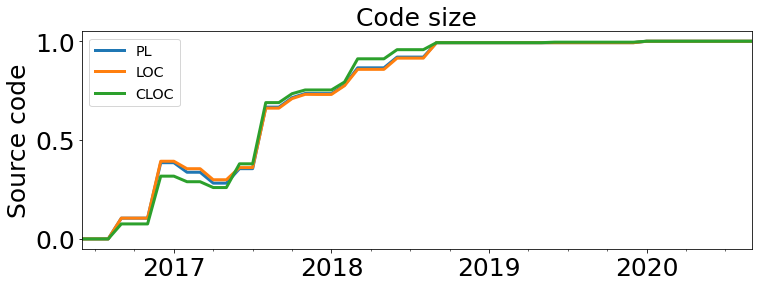

In [112]:
plotSourceCodeMetrics("sourceCodeSizeExample.pdf", azureMetrics["Azure-Samples/compute-java-manage-vm"])

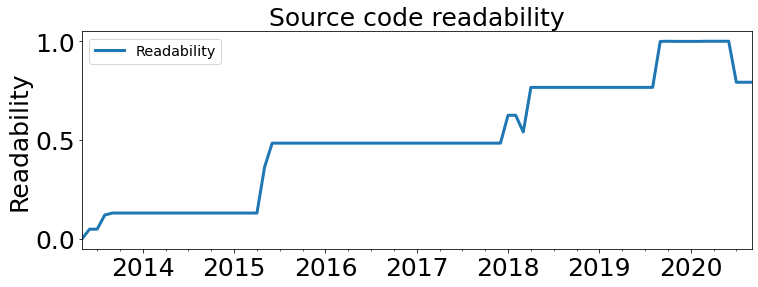

In [113]:
plotReadability("sourceCodeReadabilityExample.pdf", springMetrics["spring-guides/gs-batch-processing"])

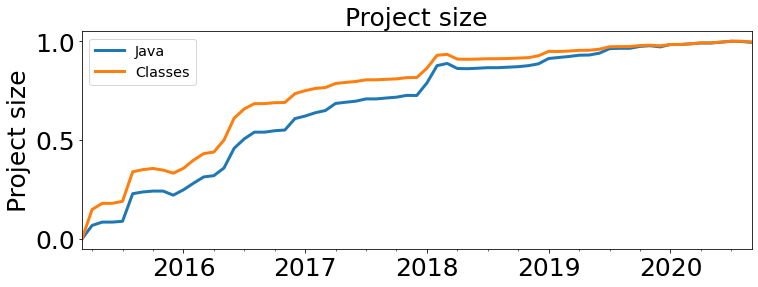

In [114]:
plotProjectSizeMetrics("projectSizeExample.pdf", androidMetrics["googlesamples/android-testdpc"])

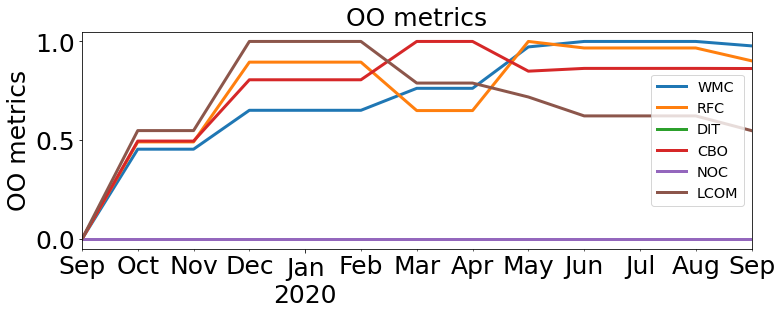

In [115]:
plotOOMetrics("ooMetricsExample.pdf", azureMetrics["Azure-Samples/Azure-Spring-Cloud-Samples"])

In [116]:
def plotSourceCodeMetrics(sample, dataset):
    subplot = dataset["PL"].plot(legend=True)
    subplot = dataset["LOC"].plot(legend=True)
    subplot = dataset["CLOC"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("Source code")
    subplot.set_title(f"Code size of {sample}")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}.jpg",bbox_inches = 'tight')    

In [117]:
def plotReadability(sample, dataset):
    subplot = dataset["Readability"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Source code readability of {sample}")
    subplot.set_ylabel("Readability")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}.jpg",bbox_inches = 'tight')

In [118]:
def plotProjectSizeMetrics(sample, dataset):
    subplot = dataset["Java"].plot(legend=True)
    subplot = dataset["Classes"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Project size of {sample}")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}.jpg",bbox_inches = 'tight')

In [119]:
def plotOOMetrics(sample, dataset):
    subplot = dataset["WMC"].plot(legend=True)     
    subplot = dataset["RFC"].plot(legend=True)
    subplot = dataset["DIT"].plot(legend=True)
    subplot = dataset["CBO"].plot(legend=True)
    subplot = dataset["NOC"].plot(legend=True)
    subplot = dataset["LCOM"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_title(f"OO metrics of {sample}")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}.jpg",bbox_inches = 'tight')

In [120]:
def plotAllMetrics(dataset):
    for sample in dataset.keys():
        plt.clf()
        plotSourceCodeMetrics(sample, dataset[sample])
        plotReadability(sample, dataset[sample])
        plotProjectSizeMetrics(sample, dataset[sample])
        plotOOMetrics(sample, dataset[sample])

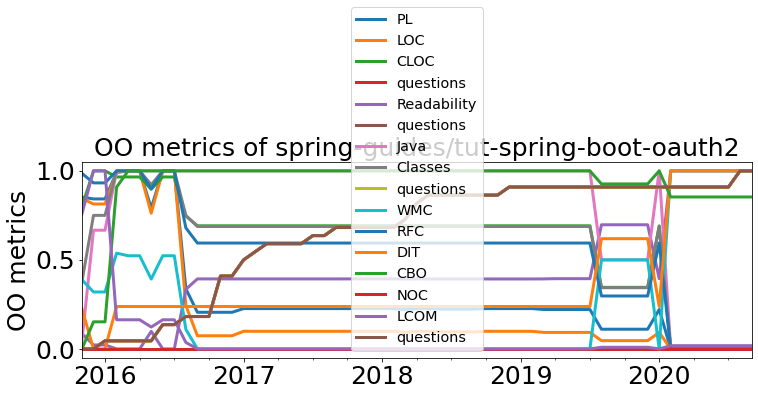

In [121]:
plotAllMetrics(androidMetrics)
plotAllMetrics(awsMetrics)
plotAllMetrics(azureMetrics)
plotAllMetrics(springMetrics)